# 3i005 - projet 2 - 2022oct
# CLASSIFICATIONS PROBABILISTES

Le but de ce projet est d'√©tudier les m√©thodes de classifications auxquelles les statistiques donnent acc√®s naturellement. Il s'agira donc d'√©tudier les outils de classifications probabilistes. C'est bien √©videmment une petite partie de l'ensemble des m√©thodes de classification existant.

### √âvaluation du projet
<font color="red">L'ensemble des codes que vous r√©aliserez seront accessible √† partir du ficher `projet.py`.  L'√©valuation de votre code se fera √† l'aide de donn√©es autres que celles du projet dans un programme qui commencera par importer votre `projet.py`. **il faudra donc une vigilance particuli√®re √† respecter les noms et la signature des classes, fonctions et m√©thodes ! Le code dans ce notebook ne doit pas √™tre modifi√©, votre code dans `projet.py` doit permettre d'ex√©cuter ce notebook et d'avoir les m√™mes r√©sultats que ceux de la version originale**.</font>

* Si des questions m√©ritent des r√©ponses ouvertes, ces r√©ponses seront ins√©r√©es dans ce notebook dans une cellule imm√©diatement en dessous de celle contenant la question (visible par <img src="question.png"  align="bottom">) et nulle part ailleurs (la cellule existe et contient le texte `(votre r√©ponse ici)`).

* Une attention soutenue sera demand√©e √† la documentation de votre code et √† sa qualit√© ainsi qu'√† la qualit√© des r√©ponses ouvertes dans ce notebook.

* Enfin, tous nos classifieurs seront cod√©s dans des classes, sous-classes de `AbstractClassifier` dans le fichier `utils.py`. Pour rappel de la programmation orient√©e object en python 3, par exemple : https://realpython.com/python3-object-oriented-programming/#dog-park-example. 

* Vous soumettrez un fichier `projet2-GrX-Y.{zip|tgz}` o√π `X` est votre groupe, `Y` est votre (ou vos) noms. Le format `zip` ou `tgz` est au choix. (Par exemple : `projet2-Gr1-Nom1Prenom1-Nom2Prenom2.tgz`.)

### Base utilis√©e : heart disease (Cleveland database)

        This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. 
        The `target` field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1) from absence (value 0). 

| champs | definition |
|--------|------------|
|age|  age in years| 
|sex| (1 = male; 0 = female)| 
|cp|  chest pain type| 
|trestbps| resting blood pressure (in mm Hg on admission to the hospital)| 
|chol| serum cholestoral in mg/dl| 
|fbs| (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)| 
|restecg| resting electrocardiographic results| 
|thalach| maximum heart rate achieved| 
|exang| exercise induced angina (1 = yes; 0 = no)| 
|oldpeak| ST depression induced by exercise relative to rest| 
|slope|the slope of the peak exercise ST segment| 
|ca| number of major vessels (0-3) colored by flourosopy| 
|thal|3 = normal; 6 = fixed defect; 7 = reversable defect| 
|target| 1 or 0 | 

Notre but est donc de proposer des classifieurs qui tentent de pr√©dire la valeur de `target` √† partir des autres champs en utilisant des arguments probabilistes.

## Simplification de la base (pr√©lude au projet : pas de travail √† faire dans cette partie)

In [1]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python

In [2]:
# Afin de vous simplifier la vie : √† chaque modification de projet.py, il sera recharg√© par la session jupyter.
%load_ext autoreload
%autoreload 2

# utils.py contient des fonctions et des classes d'aide au projet. IL NE FAUT RIEN CHANGER DANS CE FICHIER
import utils

# Cette ligne importe vos codes. VOTRE CODE EST A √âCRIRE DANS projet.py. 
import projet # votre code

In [3]:
data=pd.read_csv("heart.csv")
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

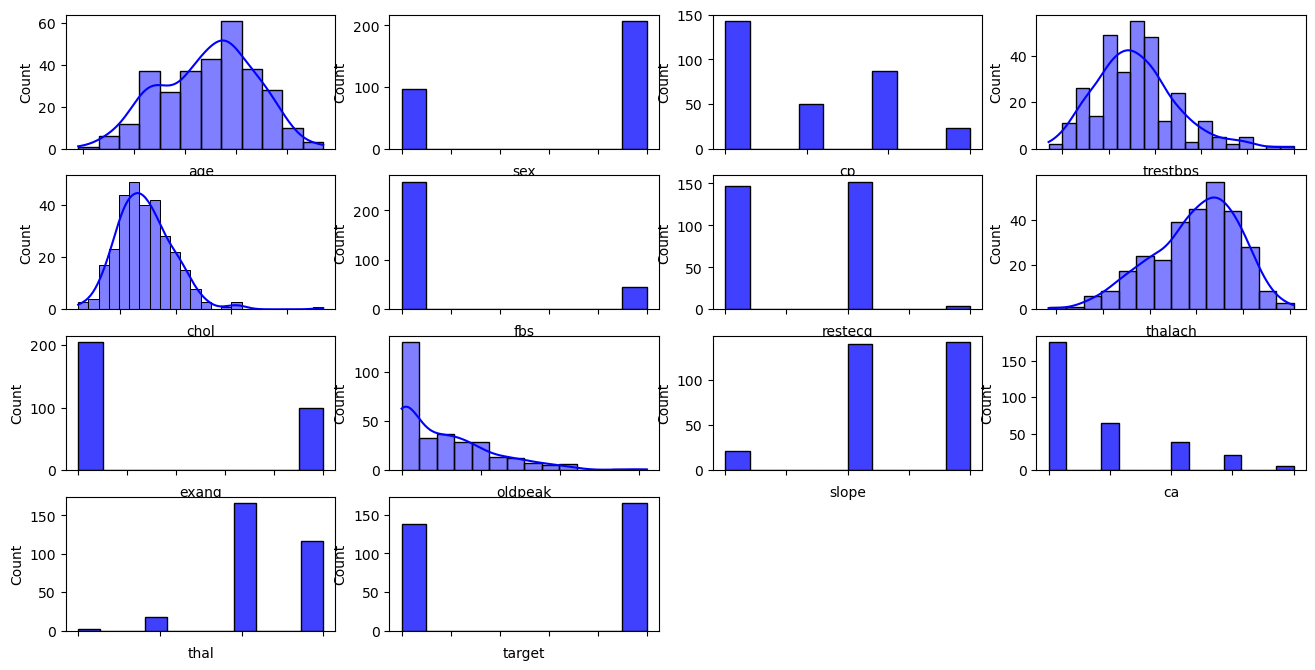

In [4]:
utils.viewData(data)

Certaines variabless comme `age`, `thalach`, etc. poss√®dent un grand nombre de modalit√©s, rendant difficile le traitement. Nous simplifions donc la base en discr√©tisant au mieux toutes les variables qui ont plus de 5 valeurs.

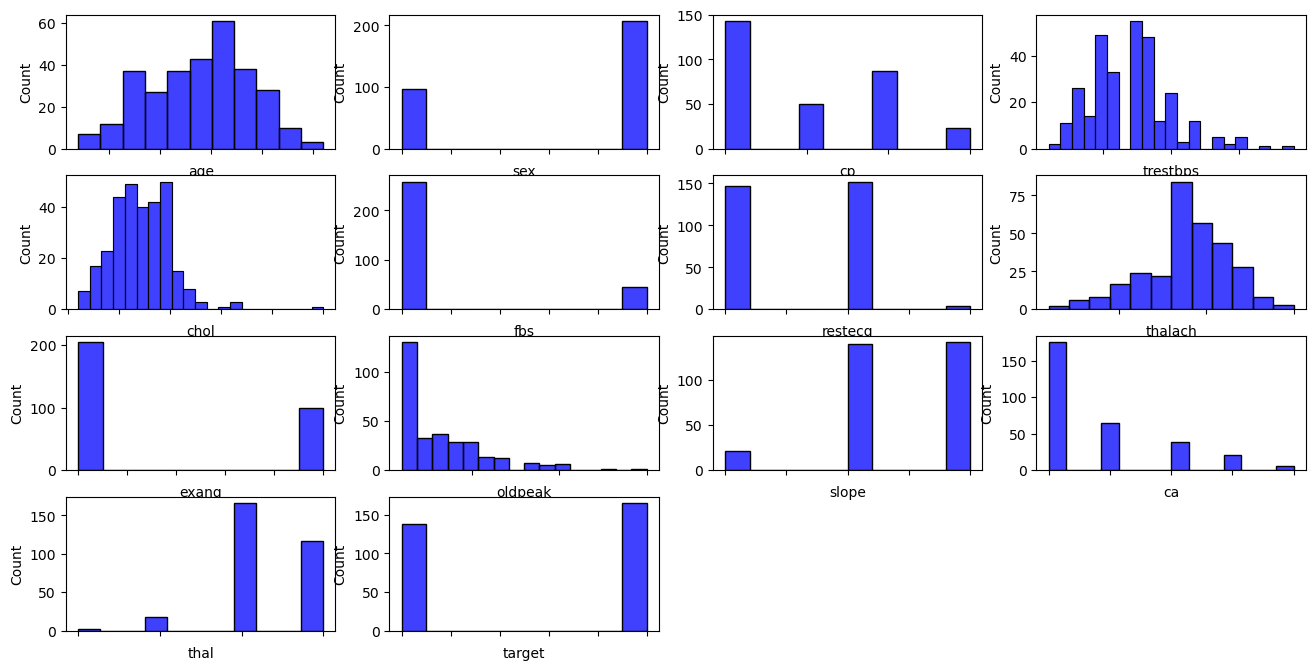

In [5]:
discretise=utils.discretizeData(data)
utils.viewData(discretise,kde=False)

Nous utilisons maintenant 2 fichiers csv **pr√©par√©s √† l'avance pour ce projet** √† partir de cette base afin de rendre les r√©sultats plus int√©ressants (en particulier, les 2 classes sont un peu plus d√©s√©quilibr√©es).

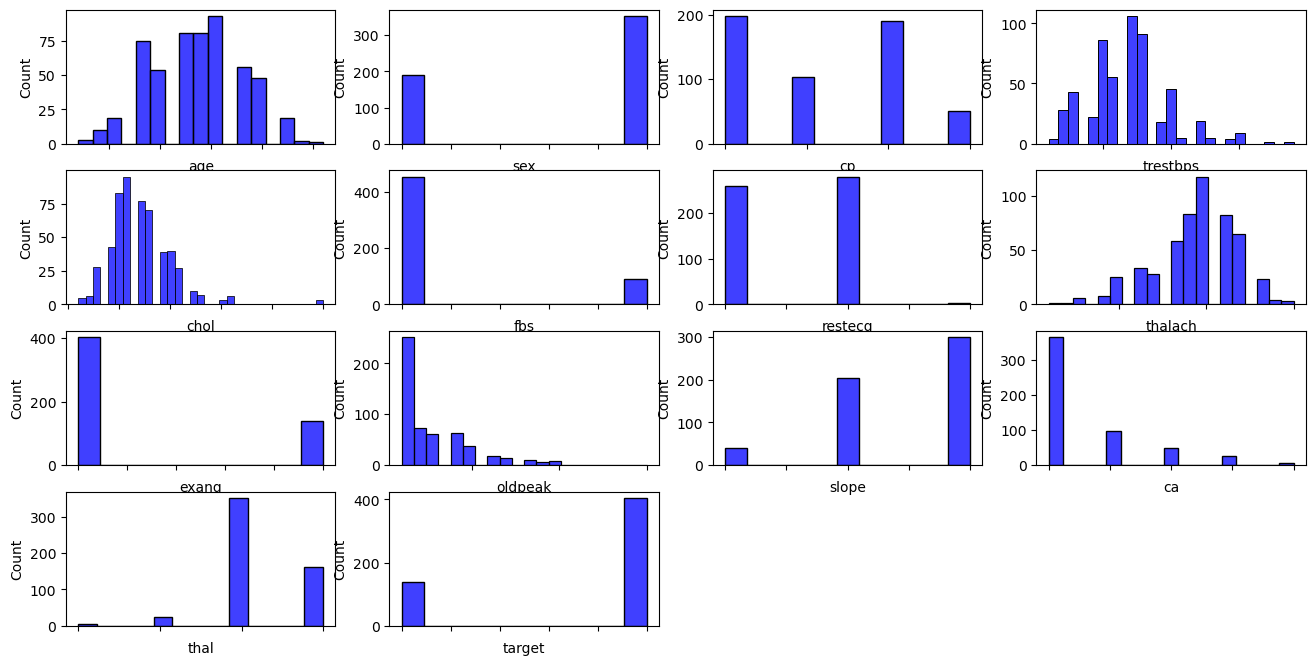

In [6]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
utils.viewData(train,kde=False)   

<img src="warning.png"  align="middle"> √Ä partir de maintenant, nous utilisons le dataframe `train` qui contient les donn√©es pour l'apprentissage et `test` qui contient les donn√©es pour la validation.

# Classification a priori

## Question 1 
Dans une fonction `getPrior`, calculer la probabilit√© a priori de la classe $1$ ainsi que l'intervalle de confiance √† 95% pour l'estimation de cette probabilit√©.

In [7]:
# cette fonction doit donc rendre un dictionnaire contenant 3 cl√©s 'estimation', 'min5pourcent', 'max5pourcent' (L'ORDRE DES CLES N'EST PAS IMPORTANTE DANS UN DICTIONNAIRE)
projet.getPrior(train) 

{'estimation': 0.7453874538745388,
 'min5pourcent': 0.7087109975695709,
 'max5pourcent': 0.7820639101795066}

In [8]:
projet.getPrior(test) 

{'estimation': 0.69,
 'min5pourcent': 0.62590170673099,
 'max5pourcent': 0.7540982932690099}

## Question 2 : programmation orient√©e objet dans la hi√©rarchie des `Classifier`

On propose de repr√©senter les classifieurs en python par des classes d'une hi√©rarchie. Un classifieur r√©pond √† une question principale : √©tant donn√© un vecteur d'attributs, quelle est la classe propos√©e ?
Nous proposons donc une classe de base qu'il s'agira d'**am√©liorer et de sp√©cialiser en la sous-classant** : `AbstractClassifier` dans le fichier `utils.py` 

### Question 2a
Ecrire dans `projet.py` un classifieur `APrioriClassifier` (enfant de `AbstractClassifier`) qui utilise le r√©sultat de la question 1 pour estimer tr√®s simplement la classe de chaque individu par la classe majoritaire.  

In [9]:
cl=projet.APrioriClassifier()
clpredite=cl.estimClass(None) # n'importe quoi donne la m√™me classe pour un classifieur a priori 
# la valeur pr√©dite n'est pas affich√©e sciemment

<div style="float:right;margin:0 10px 10px 0">
    <img src="PrecisionRappel.png">
</div>

### Question 2b : √©valuation de classifieurs

Impl√©menter √©galement la m√©thode `statsOnDF` qui rendra les valeurs suivantes :

- VP : nombre d'individus avec target=1 et classe pr√©vue=1
- VN : nombre d'individus avec target=0 et classe pr√©vue=0
- FP : nombre d'individus avec target=0 et classe pr√©vue=1
- FN : nombre d'individus avec target=1 et classe pr√©vue=0
- pr√©cision 
- rappel


- <i>Petite aide : comment it√©rer sur un dataframe</i>

`for t in train.itertuples():
    dic=t._asdict()
    print("ca={} oldpeak={} target={}".format(dic['ca'],dic['oldpeak'],dic['target']))
`

- <i>Par ailleurs, dans utils, il y a une fonction `getNthDict(df,n)` qui rend le dictionnaire des attributs de la $n$i√®me ligne dans `df`.</i>
    
`
getNthDict(train,0)
{'age': 9, 'sex': 1, 'cp': 3, 'trestbps': 9, 'chol': 6, 'fbs': 1, 'restecg': 0, 'thalach': 9, 'exang': 0, 'oldpeak': 6, 'slope': 0, 'ca': 0, 'thal': 1, 'target': 1}
`

In [9]:
cl=projet.APrioriClassifier()
print("test en apprentissage : {}".format(cl.statsOnDF(train)))
print("test en validation: {}".format(cl.statsOnDF(test)))

#test en apprentissage : {'VP': 404, 'VN': 0, 'FP': 138, 'FN': 0, 'Pr√©cision': 0.7453874538745388, 'Rappel': 1.0}
#test en validation: {'VP': 138, 'VN': 0, 'FP': 62, 'FN': 0, 'Pr√©cision': 0.69, 'Rappel': 1.0}

test en apprentissage : {'VP': 404, 'VN': 0, 'FP': 138, 'FN': 0, 'Pr√©cision': 0.7453874538745388, 'Rappel': 1.0}
test en validation: {'VP': 138, 'VN': 0, 'FP': 62, 'FN': 0, 'Pr√©cision': 0.69, 'Rappel': 1.0}


## Question 3 : classification probabiliste √† 2 dimensions

La classification a priori ne donne pas d'excellents r√©sultats puiqu'elle se contente de la r√®gle majoritaire. On se propose donc maintenant essayer d'enrichir notre processus de d√©cision en tenant compte d'une caract√©ristique de la base de donn√©es.

### Question 3.a : probabilit√©s conditionelles

√âcrire une fonction `P2D_l(df,attr)` qui calcule dans le dataframe la probabilit√© $P(attr|target)$ sous la forme d'un dictionnaire asssociant √† la valeur $t$ un dictionnaire associant √† la valeur $a$ la probabilit√© $P(attr=a|target=t)$.

In [10]:
projet.P2D_l(train,'thal')

#{1: {1: 0.03217821782178218,
#  2: 0.7821782178217822,
#  3: 0.1782178217821782,
#  0: 0.007425742574257425},
# 0: {1: 0.08695652173913043,
#  2: 0.2608695652173913,
#  3: 0.644927536231884,
#  0: 0.007246376811594203}}

{1: {0: 0.007425742574257425,
  1: 0.03217821782178218,
  2: 0.7821782178217822,
  3: 0.1782178217821782},
 0: {0: 0.007246376811594203,
  1: 0.08695652173913043,
  2: 0.2608695652173913,
  3: 0.644927536231884}}

√âcrire une fonction `P2D_p(df,attr)` qui calcule dans le dataframe la probabilit√© $P(target|attr)$ sous la forme d'un dictionnaire associant √† la valeur $a$ un dictionnaire asssociant √† la valeur $t$ la probabilit√© $P(target=t|attr=a)$.

In [11]:
projet.P2D_p(train,'thal')


#{1: {1: 0.52, 0: 0.48},
# 2: {1: 0.8977272727272727, 0: 0.10227272727272728},
# 3: {1: 0.4472049689440994, 0: 0.5527950310559007},
# 0: {1: 0.75, 0: 0.25}}

{1: {1: 0.52, 0: 0.48},
 2: {1: 0.8977272727272727, 0: 0.10227272727272728},
 3: {1: 0.4472049689440994, 0: 0.5527950310559007},
 0: {1: 0.75, 0: 0.25}}

### Question 3.b : classifieurs 2D par maximum de vraisemblance

Supposons qu'un individu ait la valeur $a$ pour l'$attr$, un classifieur du type $P2D_l$ pourrrait donc utiliser  $P(attr=a|target=t)$ et s√©lectionner comme estimation de la classe de l'individu la valeur $t=0$ ou $t=1$ maximisant cette probabilit√©. $P(attr=a|target)$ est la vraisemblance d'observer $attr=a$ quand $target=0$ ou $target=1$. Un tel classifieur utilise donc le principe du **maximum de vraisemblance** (ML=Max Likelihood). 

Pour construire un tel classifieur, il faut initialiser l'attribut utilis√© puis construire la table `P2Dl`. La fonction `estimClass` rendra la position du maximum trouv√© dans cette table.


> Supposons un individu dont $thal=3$, alors dans la table P2Dl, on trouve $0.178$ pour $target=1$ et $0.644$ pour $target=0$, la bonne classe d'apr√®s le crit√®re du ML est donc $0$

√âcrire une classe `ML2DClassifier` qui utilise une telle proc√©dure de maximum de vraisemblance pour estimer la classe d'un individu. Afin de ne pas avoir √† r√©√©crire la m√©thode `statsOnDF` qui ne devrait pas changer, `ML2DClassifier` aura pour parent la classe `APrioriClassifier`.

**PS**- penser bien √† calculer une seule fois la table `P2Dl` dans le constructeur de la classe afin de ne pas it√©rer sur toute la base √† chaque fois que vous appelez la m√©thode `estimClass`.

**PS2**- Dans les cas d'√©galit√© des 2 probabilit√©s, on choisira la classe 0.

In [12]:
cl=projet.ML2DClassifier(train,"thal") # cette ligne appelle projet.P2Dl(train,"thal")
for i in [0,1,2]:
    print("Estimation de la classe de l'individu {} par ML2DClassifier : {}".format(i,cl.estimClass(utils.getNthDict(train,i))))
    
    

    
#Estimation de la classe de l'individu 0 par ML2DClassifier : 0
#Estimation de la classe de l'individu 1 par ML2DClassifier : 1
#Estimation de la classe de l'individu 2 par ML2DClassifier : 1


Estimation de la classe de l'individu 0 par ML2DClassifier : 0
Estimation de la classe de l'individu 1 par ML2DClassifier : 1
Estimation de la classe de l'individu 2 par ML2DClassifier : 1


In [13]:
print("test en apprentissage : {}".format(cl.statsOnDF(train)))
print("test en validation: {}".format(cl.statsOnDF(test)))


#test en apprentissage : {'VP': 319, 'VN': 101, 'FP': 37, 'FN': 85, 'Pr√©cision': 0.8960674157303371, 'Rappel': 0.7896039603960396}
#test en validation: {'VP': 113, 'VN': 48, 'FP': 14, 'FN': 25, 'Pr√©cision': 0.889763779527559, 'Rappel': 0.8188405797101449}

#Cette fonction sur ce classifieurne marche malheureusement pas, mais nous avons quand m√™me essayer 
#de l'implementer correctement plusieurs fois pour qu'elle fonctionne (en vain). La version la plus "pouss√©e"
#Est pr√©sente dans le code

test en apprentissage : {'VP': 319, 'VN': 101, 'FP': 37, 'FN': 85, 'Pr√©cision': 0.8960674157303371, 'Rappel': 0.7896039603960396}
test en validation: {'VP': 113, 'VN': 48, 'FP': 14, 'FN': 25, 'Pr√©cision': 0.889763779527559, 'Rappel': 0.8188405797101449}


### Question 3.c : classifieurs 2D par maximum a posteriori

Supposons qu'un individu ait la valeur $a$ pour l'$attr$, un classifieur du type $P2D_p$ pourrrait donc utiliser  $P(target=t|attr=a)$ et s√©lectionner comme estimation de la classe de l'individu la valeur $t=0$ ou $t=1$ maximisant cette probabilit√©. $P(target|attr=a)$ est la distribution a posteriori de $target$ apr√®s avoir observ√© $attr=a$. Un tel classifieur utilise donc le principe du **maximum a posteriori** (MAP). 

Pour construire un tel classifieur, il faut initialiser l'attribut utilis√© puis construire la table `P2Dp`. La fonction `estimClass` rendra la position du maximum trouv√© dans cette table.

> Supposons un individu dont $thal=3$, alors dans la table P2Dp, on trouve $0.447$ pour $target=1$ et $0.552$ pour $target=0$, la bonne classe d'apr√®s le crit√®re du ML est donc $0$

√âcrire une classe `MAP2DClassifier` qui utilise une telle proc√©dure de maximum de vraisemblance pour estimer la classe d'un individu. Afin de ne pas avoir √† r√©√©crire la m√©thode `statsOnDF` qui ne devrait pas changer, `MAP2DClassifier` h√©ritera de `AprioriClassifier`.

**PS**- penser bien √† calculer une seule fois la table `P2Dp` dans le constructeur afin de ne pas it√©rer sur toute la base √† chaque fois que vous appelez la m√©thode `estimClass`.

**PS2**- Dans les cas d'√©galit√© des 2 probabilit√©s, on choisira la classe 0.

In [14]:
cl=projet.MAP2DClassifier(train,"thal") # cette ligne appelle projet.P2Dp(train,"thal")
for i in [0,1,2]:
    print("Estimation de la classe de l'individu {} par MAP2DClasssifer) : {}".format(i,cl.estimClass(utils.getNthDict(train,i)))) 

Estimation de la classe de l'individu 0 par MAP2DClasssifer) : 1
Estimation de la classe de l'individu 1 par MAP2DClasssifer) : 1
Estimation de la classe de l'individu 2 par MAP2DClasssifer) : 1


In [15]:
print("test en apprentissage : {}".format(cl.statsOnDF(train)))
print("test en validation: {}".format(cl.statsOnDF(test)))

test en apprentissage : {'VP': 332, 'VN': 89, 'FP': 49, 'FN': 72, 'Pr√©cision': 0.8713910761154856, 'Rappel': 0.8217821782178217}
test en validation: {'VP': 114, 'VN': 43, 'FP': 19, 'FN': 24, 'Pr√©cision': 0.8571428571428571, 'Rappel': 0.8260869565217391}


### Question 3.d - comparaison

<div style="float:left;margin:0 10px 10px 0">
    <img src="question.png">
</div>
Quelle classifieur pr√©f√©rez-vous en th√©orie entre `APrioriClassifier`, `ML2DClassifier` et `MAP2DClassifier` ? Quels r√©sultats vous semble-les plus int√©ressants ?

Pour moi, je pr√©f√®re la classifieur MAP2DClassifier.

Pour la classifieur ML2DClassifie, nous utilisons l'un principe du maximum de vraisemblance, nous calculons la probabilit√© de chaque valeur de cet attribut, √©tant donn√© que l'on conna√Æt d√©j√† la condition target = 1 ou target = 0, alors en comparant ces deux probabilit√©s $P(attr|target = 1) et P(attr|target = 0)$, nous pouvons estimer √† quelle classe il devrait appartenir.

Pour la classifieur MAP2DClassifier, nous utilisons l'un principe du maximum a posteriori, nous calculons la probabilit√© de target = 0 ou target = 1, √©tant donn√© que l'on conna√Æt d√©j√† la condition de cet attr √©gale √† a. En r√©alit√©, nous voulons d√©terminer si quelqu'un a une maladie cardiaque(c.√†.d estimer la classe) en d√©terminant la probabilit√© d'avoir une maladie cardiaque √† partir de sympt√¥mes(attributs) connus, donc pour moi, la classifieur MAP2DClassifier est plus logique.

Si nous ne regardons simplement que la pr√©cision et le rappel calcul√©e par les deux classes, ils sont en fait presque la m√™me valeur.

## Question 4

On peut bien s√ªr se dire que les classifieurs ont int√©r√™t √† utiliser le plus d'information possible. Il serait donc pertinent de construire les classifieurs `ML3DClassifier`, `MAP3DClassifier`, ..., `ML14DClassifier` et `MAP14DClassifier` o√π les "$x$ `DClassifier`" prendrait $x-1$ attributs pour construire la pr√©diction de `target`. Toutefois, un probl√®me va nous arr√™ter : les tables $P14Da$ et $P14Db$ sont de bien trop grande taille. 

### Question 4.1 : complexit√© en m√©moire

√âcrire une fonction `nbrParams` qui calcule la taille m√©moire de ces tables $P(target|attr_1,..,attr_k)$ √©tant donn√© un dataframe et la liste $[target,attr_1,...,attr_l]$ en supposant qu'un float est repr√©sent√© sur 8octets.

In [32]:
projet.nbParams(train,['target'])
projet.nbParams(train,['target','thal'])
projet.nbParams(train,['target','age'])
projet.nbParams(train,['target','age','thal','sex','exang'])
projet.nbParams(train,['target','age','thal','sex','exang','slope','ca','chol'])
projet.nbParams(train)

#1 variable(s) : 16 octets 
#2 variable(s) : 64 octets 
#2 variable(s) : 208 octets 
#5 variable(s) : 3328 octets = 3ko 256o 
#8 variable(s) : 798720 octets = 780ko 0o 
#14 variable(s) : 58657996800 octets = 54go 644mo 640ko 0o 

1 variable(s) :  16 octets
2 variable(s) :  64 octets
2 variable(s) :  208 octets
5 variable(s) :  3328 octets
8 variable(s) :  798720 octets
14 variable(s) :  58657996800 octets


On ne peut donc pas manipuler de telles tables et il faut trouver de nouvelles fa√ßon de repr√©senter les distributions de probabilit√©s, quitte √† en faire des approximations. 

La meilleure fa√ßon de simplifier la repr√©sentation d'une distribution de probabilit√© est d'utiliser des hypoth√®ses d'ind√©pendances. Ainsi, dans une loi jointe des variables $A,B,C,D,E$, si on suppose l'ind√©pendance de ces 5 variables, on sait qu'on pourra √©crire que $$P(A,B,C,D,E)=P(A)*P(B)*P(C)*P(D)*P(E)$$ et donc remplacer un tableau √† 5 dimensions par 5 tableaux monodimensionnels.

### Question 4.2 : complexit√© en m√©moire sous hypoth√®se d'ind√©pendance compl√®te

Ecrire une fonction `nbrParamsIndep` qui calcule la taille m√©moire n√©cessaire pour repr√©senter les tables de probabilit√© √©tant donn√© un dataframe, en supposant qu'un float est repr√©sent√© sur 8octets et **en supposant l'ind√©pendance des variables**.

In [31]:
projet.nbParamsIndep(train[['target']])
projet.nbParamsIndep(train[['target','thal']])
projet.nbParamsIndep(train[['target','age']])
projet.nbParamsIndep(train[['target','age','thal','sex','exang']])
projet.nbParamsIndep(train[['target','age','thal','sex','exang','slope','ca','chol']])
projet.nbParamsIndep(train)


#1 variable(s) : 16 octets 
#2 variable(s) : 48 octets 
#2 variable(s) : 120 octets 
#5 variable(s) : 184 octets 
#8 variable(s) : 376 octets 
#14 variable(s) : 800 octets 


1 variable(s) :  16 octets
2 variable(s) :  48 octets
2 variable(s) :  120 octets
5 variable(s) :  184 octets
8 variable(s) :  376 octets
14 variable(s) :  800 octets


### Question 4.3

L'ind√©pendance compl√®te comme ci-dessus am√®ne forc√©ment √† un classifier a priori (aucun attribut n'apporte d'information sur `target`).

Nous allons donc essayer de trouver des mod√®les supposant une certaine forme d'ind√©pendance partielle qui permettra d'all√©ger quand m√™me la repr√©sentation en m√©moire de la distribution de probabilit√©s. Ce sont les ind√©pendances conditionnelles. Si l'on sait par exemple que $A$ est ind√©pendant de $C$ sachant $B$, on peut √©crire la loi jointe :
$$P(A,B,C)=P(A)*P(B|A)*P(C|B)$$


<div style="float:left;margin:0 10px 10px 0">
    <img src="question.png">
</div>
Pouvez vous le prouvez ?

Normalment, $ùëÉ(ùê¥,ùêµ,ùê∂)=ùëÉ(ùê¥)‚àóùëÉ(ùêµ|ùê¥)‚àóùëÉ(ùê∂|ùê¥ùêµ)$, et on sait que ùê¥ est ind√©pendant de ùê∂ sachant ùêµ, alors dans $ùëÉ(ùê∂|ùê¥ùêµ)$, on peut directement transfer a $ùëÉ(ùê∂|ùêµ)$

<div style="float:left;margin:0 10px 10px 0">
    <img src="question.png">
</div>
Si les 3 variables $A$, $B$ et $C$ ont $5$ valeurs, quelle est la taille m√©moire en octet n√©cessaire pour repr√©senter cette distribution avec et sans l'utilisation de l'ind√©pendance conditionnelle ?

Avec l'utilisation de l'ind√©pendance conditionnelle : (5+5+5) * 8

Sans l'utilisation de l'ind√©pendance conditionnelle : 5 * 5 * 5 * 8

## Question 5 : Mod√®les graphiques

Afin de repr√©senter efficacement les ind√©pendances conditionnelles utilis√©es pour repr√©senter une distribution jointe de grande taille, on peut utiliser un graphe orient√© qui se lit ainsi : dans la d√©composition de la loi jointe, chaque variable $X$ apparaitra dans un facteur de la forme $P(X|Parents_X)$.  On note que cette factorisation n'a de sens que si le graphe n'a pas de circuit (c'est un DAG).

Ainsi, on repr√©sente la factorisation $P(A,B,C)=P(A)*P(B|A)*P(C|B)$ par le graphe suivant : $A$ n'a pas de parent, $B$ a pour parent $A$ et $C$ a pour parent $B$.

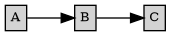

In [19]:
utils.drawGraphHorizontal("A->B;B->C")

### Question 5.1

<div style="float:left;margin:0 10px 10px 0">
    <img src="question.png">
</div>
Dans les 2 cellules suivantes, dessiner les graphes pour 5 variables $A,B,C,D,E$ compl√®tement ind√©pendantes puis pour ces 5 m√™me variables sans aucune ind√©pendance.

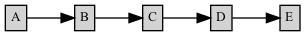

In [18]:
utils.drawGraphHorizontal("A->B;B->C;C->D;D->E")

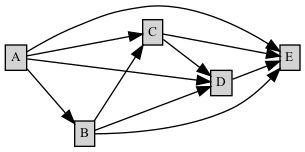

In [19]:
utils.drawGraphHorizontal("A->B;A->C;B->C;A->D;B->D;C->D;A->E;B->E;C->E;D->E")

### Question 5.2 : na√Øve Bayes

Un mod√®le simple souvent utilis√©e est le **Na√Øve Bayes**. Il suppose que $2$ attributs sont toujours ind√©pendants conditionnellement √† `target`.

Ce mod√®le est √©videmment tr√®s simpliste et certainement faux. Toutefois, en classification, il donne souvent de bon r√©sultats.

<div style="float:left;margin:0 10px 10px 0">
    <img src="question.png">
</div>
√âcrire comment se d√©compose la vraisemblance $P(attr1,attr2,attr3,\cdots|target)$.

√âcrire comment se d√©compose la distribution a posteriori $P(target|attr1,attr2,attr3,\cdots)$ <em>(ou du moins une fonction proportionnelle √† cette distribution a posteriori)</em>.

1:

Nous savons que $P(attri|target)$ est independent que $P(attrj|target)$,alors nous pouvons le d√©composer comme:

$$P(attr1,attr2,attr3,\cdots|target) = P(attr1|target)*ùëÉ(attr2|target)*ùëÉ(attr3|target)\cdots$$

2:     
      
Et pour $P(target|attr1,attr2,attr3,‚ãØ)$, nous avons:


$$P(target|attr1,attr2,attr3,‚ãØ) = \frac{P(attr1,attr2,attr3,\cdots|target)*P(target)}{P(attr1,attr2,\cdots)}$$


Pour trouver $P(attr1,attr2,\cdots)$, nous introduisons la variable target : $P(attr1,attr2,\cdots,target)$

Donc $P(attr1,attr2,\cdots,target) = P(attr1,attr2,attr3,\cdots|target)*P(target) = \sum_{target=0}^1 P(target)*\prod_{i=1}^n {P(attr i|target)}$


A la fin, 
$$P(target|attr1,attr2,attr3,‚ãØ) = \frac{P(attr1,attr2,attr3,\cdots|target)*P(target)}{\sum_{t=0}^1 P(target) * \prod_{i=1}^n {P(attr i|target)}} = \frac{P(attr1,attr2,attr3,\cdots|target)*P(target)}{P(target=0) * \prod_{i=1}^n {P(attr i|target=0)} + P(target=1) * \prod_{i=1}^n {P(attr i|target=1)}}$$ 

### Question 5.3 : mod√®le graphique et na√Øve bayes

Un mod√®le na√Øve bayes se repr√©sente sous la forme d'un graphe o√π le noeud `target` est l'unique parent de tous les attributs. Construire une fonction `drawNaiveBayes` qui a partir d'un dataframe et du nom de la colonne qui est la classe, dessine le graphe. 

**Note** : une fonction qui dessine un graphe retourne un appel √† `utils.drawGraph`, par exemple :

```python
def dessin_A_vers_B():
  return utils.drawGraph("A->B")
```

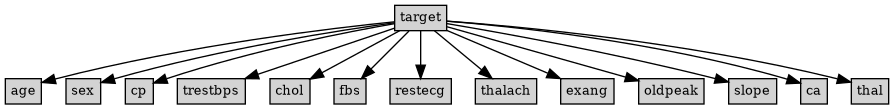

In [20]:
projet.drawNaiveBayes(train,"target")

√âcrire une fonction `nbrParamsNaiveBayes` qui calcule la taille m√©moire n√©cessaire pour repr√©senter les tables de probabilit√© √©tant donn√© un dataframe, en supposant qu'un float est repr√©sent√© sur 8octets et **en utilisant l'hypoth√®se du Naive Bayes**.

In [20]:
projet.nbParamsNaiveBayes(train,'target',[])
projet.nbParamsNaiveBayes(train,'target',['target','thal'])
projet.nbParamsNaiveBayes(train,'target',['target','age'])
projet.nbParamsNaiveBayes(train,'target',['target','age','thal','sex','exang'])
projet.nbParamsNaiveBayes(train,'target',['target','age','thal','sex','exang','slope','ca','chol'])
projet.nbParamsNaiveBayes(train,'target')


#0 variable(s) : 16 octets 
#2 variable(s) : 80 octets 
#2 variable(s) : 224 octets 
#5 variable(s) : 352 octets 
#8 variable(s) : 736 octets 
#14 variable(s) : 1584 octets = 1ko 560o 


0 variable(s) :  16 octets
2 variable(s) :  80 octets
2 variable(s) :  224 octets
5 variable(s) :  352 octets
8 variable(s) :  736 octets
14 variable(s) :  1584 octets


On voit que l'augmentation de la m√©moire n√©cessaire est raisonnable.

### Question 5.4 : classifier na√Øve bayes

Afin de ne pas avoir √† r√©√©crire la m√©thode `statsOnDF` qui ne devrait pas changer, √©crire les classes `MLNaiveBayesClassifier` et `MAPNaiveBayesClassifier` qui h√©rite de `AprioriClassifier` et qui utilise le maximum de vraisemblance (ML) et le maximum a posteriori (MAP) pour estimer la classe d'un individu en utilisant l'hypoth√®se du Na√Øve Bayes.

De la m√™me fa√ßon que plus haut, penser √† calculer tous les param√®tres du Na√Øve Bayes dans le constructeur de la classe afin de ne pas les recalculer pour chaque classification.

D√©composer la m√©thodes `estimClass` en 2 parties : `estimProbas` qui calcule la vraisemblance et `estimClass` qui utilise `estimProbas` pour choisir la classe comme dans les classifieurs pr√©c√©dents.

In [21]:
cl=projet.MLNaiveBayesClassifier(train)

for i in [0,1,2]:
    print("Estimation de la proba de l'individu {} par MLNaiveBayesClassifier : {}".format(i,cl.estimProbas(utils.getNthDict(train,i))))
    print("Estimation de la classe de l'individu {} par MLNaiveBayesClassifier : {}".format(i,cl.estimClass(utils.getNthDict(train,i)))) 
print("test en apprentissage : {}".format(cl.statsOnDF(train)))
print("test en validation: {}".format(cl.statsOnDF(test)))

#Estimation de la proba de l'individu 0 par MLNaiveBayesClassifier : {0: 5.265474022893807e-11, 1: 8.779438846356187e-12}
#Estimation de la classe de l'individu 0 par MLNaiveBayesClassifier : 0
#Estimation de la proba de l'individu 1 par MLNaiveBayesClassifier : {0: 0.0, 1: 1.9903404816168002e-09}
#Estimation de la classe de l'individu 1 par MLNaiveBayesClassifier : 1
#Estimation de la proba de l'individu 2 par MLNaiveBayesClassifier : {0: 3.6835223975945704e-10, 1: 1.5920340255297033e-06}
#Estimation de la classe de l'individu 2 par MLNaiveBayesClassifier : 1
#test en app rentissage : {'VP': 350, 'VN': 116, 'FP': 22, 'FN': 54, 'Pr√©cision': 0.9408602150537635, 'Rappel': 0.8663366336633663}
#test en validation: {'VP': 49, 'VN': 60, 'FP': 2, 'FN': 89, 'Pr√©cision': 0.9607843137254902, 'Rappel': 0.35507246376811596}


Estimation de la proba de l'individu 0 par MLNaiveBayesClassifier : {0: 5.265474022893807e-11, 1: 8.779438846356187e-12}
Estimation de la classe de l'individu 0 par MLNaiveBayesClassifier : 0
Estimation de la proba de l'individu 1 par MLNaiveBayesClassifier : {0: 0.0, 1: 1.9903404816168002e-09}
Estimation de la classe de l'individu 1 par MLNaiveBayesClassifier : 1
Estimation de la proba de l'individu 2 par MLNaiveBayesClassifier : {0: 3.6835223975945704e-10, 1: 1.5920340255297033e-06}
Estimation de la classe de l'individu 2 par MLNaiveBayesClassifier : 1
test en apprentissage : {'VP': 350, 'VN': 116, 'FP': 22, 'FN': 54, 'Pr√©cision': 0.9408602150537635, 'Rappel': 0.8663366336633663}
test en validation: {'VP': 49, 'VN': 60, 'FP': 2, 'FN': 89, 'Pr√©cision': 0.9607843137254902, 'Rappel': 0.35507246376811596}


In [22]:
cl=projet.MAPNaiveBayesClassifier(train)
for i in [0,1,2]:
    print("Estimation de la proba de l'individu {} par MAPNaiveBayesClassifier : {}".format(i,cl.estimProbas(utils.getNthDict(train,i))))
    print("Estimation de la classe de l'individu {} par MAPNaiveBayesClassifier : {}".format(i,cl.estimClass(utils.getNthDict(train,i)))) 
print("test en apprentissage : {}".format(cl.statsOnDF(train)))
print("test en validation: {}".format(cl.statsOnDF(test)))

#Estimation de la proba de l'individu 0 par MAPNaiveBayesClassifier : {0: 0.6719863008964105, 1: 0.32801369910358946}
#Estimation de la classe de l'individu 0 par MAPNaiveBayesClassifier : 0
#Estimation de la proba de l'individu 1 par MAPNaiveBayesClassifier : {0: 0.0, 1: 1.0}
#Estimation de la classe de l'individu 1 par MAPNaiveBayesClassifier : 1
#Estimation de la proba de l'individu 2 par MAPNaiveBayesClassifier : {0: 7.90267948988375e-05, 1: 0.9999209732051012}
#Estimation de la classe de l'individu 2 par MAPNaiveBayesClassifier : 1
#test en apprentissage : {'VP': 382, 'VN': 111, 'FP': 27, 'FN': 22, 'Pr√©cision': 0.9339853300733496, 'Rappel': 0.9455445544554455}
#test en validation: {'VP': 53, 'VN': 57, 'FP': 5, 'FN': 85, 'Pr√©cision': 0.9137931034482759, 'Rappel': 0.38405797101449274}


Estimation de la proba de l'individu 0 par MAPNaiveBayesClassifier : {0: 0.6719863008964105, 1: 0.32801369910358946}
Estimation de la classe de l'individu 0 par MAPNaiveBayesClassifier : 0
Estimation de la proba de l'individu 1 par MAPNaiveBayesClassifier : {0: 0.0, 1: 1.0}
Estimation de la classe de l'individu 1 par MAPNaiveBayesClassifier : 1
Estimation de la proba de l'individu 2 par MAPNaiveBayesClassifier : {0: 7.90267948988375e-05, 1: 0.9999209732051012}
Estimation de la classe de l'individu 2 par MAPNaiveBayesClassifier : 1
test en apprentissage : {'VP': 382, 'VN': 111, 'FP': 27, 'FN': 22, 'Pr√©cision': 0.9339853300733496, 'Rappel': 0.9455445544554455}
test en validation: {'VP': 53, 'VN': 57, 'FP': 5, 'FN': 85, 'Pr√©cision': 0.9137931034482759, 'Rappel': 0.38405797101449274}


## Question 6 : <em>feature selection</em> dans le cadre du classifier naive bayes

Il est possible qu'un attribut de la base ne soit pas important pour estimer la classe d'un individu. Dans le cadre du Na√Øve Bayes, un tel noeud se reconna√Æt car il est ind√©pendant de `target`. Un tel noeud peut √™tre supprim√© du Na√Øve Bayes.

√âcrire une fonction `isIndepFromTarget(df,attr,x)` qui v√©rifie si `attr` est ind√©pendant de `target` au seuil de x%.

*Note* : vous avez le droit d'utiliser `scipy.stats.chi2_contingency` dans cette fonction.

In [23]:
for attr in train.keys():
    if attr!='target':
        print("target independant de {} ? {}".format(attr,"**YES**" if projet.isIndepFromTarget(train,attr,0.01) else "no"))
        
#target independant de age ? no
#target independant de sex ? no
#target independant de cp ? no
#target independant de trestbps ? **YES**
#target independant de chol ? no
#target independant de fbs ? **YES**
#target independant de restecg ? no
#target independant de thalach ? no
#target independant de exang ? no
#target independant de oldpeak ? no
#target independant de slope ? no
#target independant de ca ? no
#target independant de thal ? no


target independant de age ? no
target independant de sex ? no
target independant de cp ? no
target independant de trestbps ? **YES**
target independant de chol ? no
target independant de fbs ? **YES**
target independant de restecg ? no
target independant de thalach ? no
target independant de exang ? no
target independant de oldpeak ? no
target independant de slope ? no
target independant de ca ? no
target independant de thal ? no


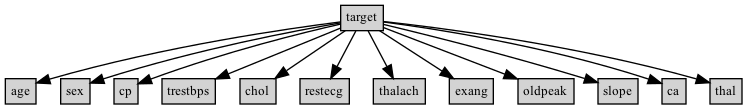

In [24]:
cl=projet.ReducedMLNaiveBayesClassifier(train,0.05)
cl.draw()

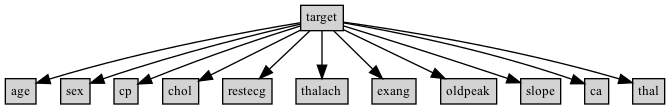

In [25]:
cl=projet.ReducedMLNaiveBayesClassifier(train,0.01)
cl.draw()

In [26]:
for i in [0,1,2]:
    print("Estimation de la proba de l'individu {} par MAPNaiveBayesClassifier : {}".format(i,cl.estimProbas(utils.getNthDict(train,i))))
    print("Estimation de la classe de l'individu {} par MAPNaiveBayesClassifier : {}".format(i,cl.estimClass(utils.getNthDict(train,i)))) 
print("test en apprentissage : {}".format(cl.statsOnDF(train)))
print("test en validation: {}".format(cl.statsOnDF(test)))

Estimation de la proba de l'individu 0 par MAPNaiveBayesClassifier : {0: 5.697482232499412e-09, 1: 2.138723717532643e-09}
Estimation de la classe de l'individu 0 par MAPNaiveBayesClassifier : 0
Estimation de la proba de l'individu 1 par MAPNaiveBayesClassifier : {0: 0.0, 1: 1.1475745797921708e-08}
Estimation de la classe de l'individu 1 par MAPNaiveBayesClassifier : 1
Estimation de la proba de l'individu 2 par MAPNaiveBayesClassifier : {0: 2.7487852876093664e-09, 1: 9.179222322695213e-06}
Estimation de la classe de l'individu 2 par MAPNaiveBayesClassifier : 1
test en apprentissage : {'VP': 348, 'VN': 117, 'FP': 21, 'FN': 56, 'Pr√©cision': 0.943089430894309, 'Rappel': 0.8613861386138614}
test en validation: {'VP': 49, 'VN': 61, 'FP': 1, 'FN': 89, 'Pr√©cision': 0.98, 'Rappel': 0.35507246376811596}


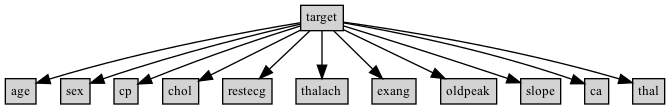

In [27]:
cl=projet.ReducedMAPNaiveBayesClassifier(train,0.01)
cl.draw()

In [29]:
for i in [0,1,2]:
    print("Estimation de la proba de l'individu {} par MAPNaiveBayesClassifier : {}".format(i,cl.estimProbas(utils.getNthDict(train,i))))
    print("Estimation de la classe de l'individu {} par MAPNaiveBayesClassifier : {}".format(i,cl.estimClass(utils.getNthDict(train,i)))) 
print("test en apprentissage : {}".format(cl.statsOnDF(train)))
print("test en validation: {}".format(cl.statsOnDF(test)))

Estimation de la proba de l'individu 0 par MAPNaiveBayesClassifier : {0: 0.47643095845795086, 1: 0.5235690415420491}
Estimation de la classe de l'individu 0 par MAPNaiveBayesClassifier : 1
Estimation de la proba de l'individu 1 par MAPNaiveBayesClassifier : {0: 0.0, 1: 1.0}
Estimation de la classe de l'individu 1 par MAPNaiveBayesClassifier : 1
Estimation de la proba de l'individu 2 par MAPNaiveBayesClassifier : {0: 0.00010227941341238209, 1: 0.9998977205865877}
Estimation de la classe de l'individu 2 par MAPNaiveBayesClassifier : 1
test en apprentissage : {'VP': 375, 'VN': 110, 'FP': 28, 'FN': 29, 'Pr√©cision': 0.9305210918114144, 'Rappel': 0.9282178217821783}
test en validation: {'VP': 53, 'VN': 56, 'FP': 6, 'FN': 85, 'Pr√©cision': 0.8983050847457628, 'Rappel': 0.38405797101449274}


## Question 7 : √©valuation des classifieurs

Nous commen√ßons √† avoir pas mal de classifieurs. Pour les comparer, une possibilit√© est d'utiliser la repr√©sentation graphique des points $(pr√©cision,rappel)$ de chacun.

### Question 7.1

<div style="float:left;margin:0 10px 10px 0">
    <img src="question.png">
</div>
O√π se trouve √† votre avis le point id√©al ? Comment pourriez-vous proposer de comparer les diff√©rents classifieurs dans cette repr√©sentation graphique ?

On a $$ pr√©cision = \frac{vrais positifs}{vrais positifs et faux positifs} $$ alors plus la valeur de vp est grande, plus la pr√©diction est pr√©cise. Plus vp est grand, plus pr√©cision sera grande selon cette formule, donc plus la pr√©cision est proche de 1, mieux c'est.

Idem, $$ rappel = \frac{vrais positifs}{vrais positifs et faux negatifs} $$ plus la valeur de vp est grande, plus le rappel sera grand selon cette formule, donc plus le rappel est proche de 1, mieux c'est. 

Et donc en conclusion, plus la pr√©cison et le rappel sont proches de 1 en m√™me temps, meilleur est le classifieur. Alors, le point id√©al est (1.0,1.0)

### Question 7.2 

√âcrire une fonction `mapClassifiers(dic,df)` qui, √† partir d'un dictionnaire `dic` de `{nom:instance de classifier}` et d'un dataframe `df`, repr√©sente graphiquement ces classifiers dans l'espace $(pr√©cision,rappel)$.

[0.7453874538745388, 0.845771144278607, 0.845771144278607, 0.9339853300733496, 0.9408602150537635, 0.9305210918114144, 0.943089430894309] [1.0, 0.8415841584158416, 0.8415841584158416, 0.9455445544554455, 0.8663366336633663, 0.9282178217821783, 0.8613861386138614]


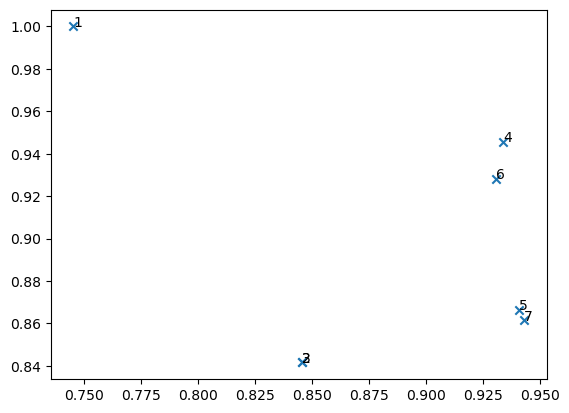

In [33]:
projet.mapClassifiers({"1":projet.APrioriClassifier(),
                "2":projet.ML2DClassifier(train,"exang"),
                "3":projet.MAP2DClassifier(train,"exang"),
                "4":projet.MAPNaiveBayesClassifier(train),
                "5":projet.MLNaiveBayesClassifier(train),
                "6":projet.ReducedMAPNaiveBayesClassifier(train,0.01),
                "7":projet.ReducedMLNaiveBayesClassifier(train,0.01),
               },train)

[0.69, 0.8066666666666666, 0.8066666666666666, 0.9137931034482759, 0.9607843137254902, 0.8983050847457628, 0.98] [1.0, 0.8768115942028986, 0.8768115942028986, 0.38405797101449274, 0.35507246376811596, 0.38405797101449274, 0.35507246376811596]


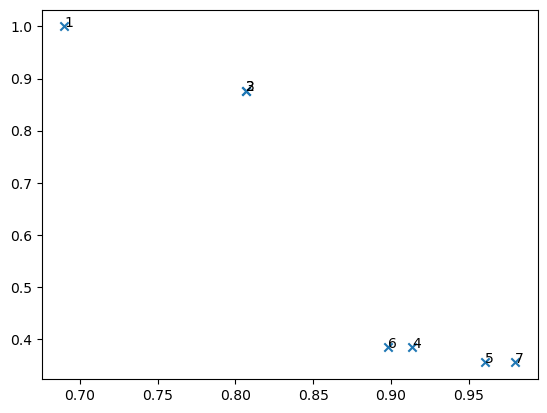

In [34]:
projet.mapClassifiers({"1":projet.APrioriClassifier(),
                "2":projet.ML2DClassifier(train,"exang"),
                "3":projet.MAP2DClassifier(train,"exang"),
                "4":projet.MAPNaiveBayesClassifier(train),
                "5":projet.MLNaiveBayesClassifier(train),
                "6":projet.ReducedMAPNaiveBayesClassifier(train,0.01),
                "7":projet.ReducedMLNaiveBayesClassifier(train,0.01),
               },test)

### Conclusion

<div style="float:left;margin:0 10px 10px 0">
    <img src="question.png">
</div>


Par les graphesÔºö

1. Nous pouvons clairement voir que les deux points de 2 et 3, toujours presque en chevauchement, indiquant que les estimations de ces deux classifieurs sont presque identiques.

2. Pour les points 5 et 7, les r√©sultats obtenus √† partir de ces deux classifieurs ne sont pas tr√®s diff√©rents, nous ne pouvons donc pas dire que les classes estim√©es sont meilleurs apr√®s avoir r√©duit certains attribus bas√©s sur le seuil de x%. Idem pour les points 4 et 6

3. Nous savons que le point id√©al est (1.0, 1.0), donc le point le plus proche de (1.0, 1.0) ou qui est le plus proche en haut √† droite du graphique, donne l'estimation la plus pr√©cise, la meilleur, donc sur cette base, nous pouvons dire que les classifieurs MAPNaiveBayesClassifier et ReducedMAPNaiveBayesClassifier sont meilleure que les claffisieurs MLNaiveBayesClassifier et ReducedMLNaiveBayesClassifier, donneent des estimation plus pr√©cise.

4. L'utilisation d'un mod√®le na√Øve bayes ne signifie pas n√©cessairement que des classes plus pr√©cises peuvent √™tre estim√©es, comme nous pouvons l'observer dans la deuxi√®me figure, o√π les classifieurs utilisant le mod√®le na√Øve bayes ne estiment pas de classes pr√©cise, et m√™me les valeurs pr√©cision pour 5 et 7 sont inf√©rieure √† 0.4

## Question 8 : Sophistication du mod√®le (question BONUS)

Utiliser un arbre pour repr√©senter la factorisation de la loi jointe est bien s√ªr une simplification : beaucoup de distribution ne peuvent √™tre repr√©sent√©es avec un seul parent par variable.

Un mod√®le plus sophisitiqu√© existe donc : le TAN (Tree-augmented Na√Øve Bayes). Il consiste √† rajouter au plus un parent √† chaque attribut parmi les autres attributs (sans cr√©er de cycle). En plus des arcs les reliant √† la classe, un TABN induit donc un arbre (plus exactement une for√™t) parmi les attributs.

Ci-dessous un TAN dont la classe est $T$.

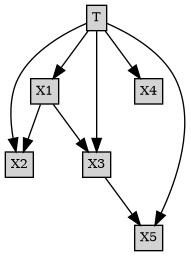

In [32]:
utils.drawGraph("T->X1;T->X2;T->X3;T->X4;T->X5;X1->X2;X1->X3;X3->X5")

et dont l'arbre (la for√™t) sur les attributs est bien :

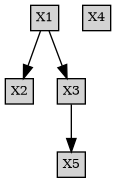

In [33]:
utils.drawGraph("X1->X2;X1->X3;X3->X5;X4")

L'algorithme pour g√©n√©rer cette structure se base sur une autre fa√ßon de tester l'ind√©pendance entre deux variables al√©atoires : l'information mutuelle qui calcule une distance entre la distribution des 2 variables et la distribution si ces 2 variables √©taient ind√©pendantes (voir https://fr.wikipedia.org/wiki/Information_mutuelle). Pour construire l'arbre (la for√™t) entre les attributs, sachant qu'on garde les arcs issus de la classe, il faut tester des ind√©pendances conditionnelles et donc calculer des informations mutuelles conditionnelles (https://en.wikipedia.org/wiki/Conditional_mutual_information).

On gardera de ces pages les deux formules :
$$I(X;Y)=\sum_{x,y} P(x,y)\log_2\frac{P(x,y)}{P(x)P(y)}$$

$$I(X;Y|Z)=\sum_{z,x,y} P(x,y,z)\log_2\frac{P(z)P(x,y,z)}{P(x,z)P(y,z)}$$

Et on remarquera que :
- $P(x,z)=\sum_y P(x,y,z)$, 
- $P(y,z)=\sum_x P(x,y,z)$, 
- $P(z)=\sum_{x,y} P(x,y,z)$, 
- etc.

### Question 8.1 : calcul des informations mutuelles
√âcrire des fonctions `projet.MutualInformation(df,x,y)` et `projet.ConditionalMutualInformation(df,x,y,z)` qui calcule ces informations mutuelles

In [34]:
for attr in train.keys():
    if attr!='target':
        print("{}->{} : {}".format("target",attr,projet.MutualInformation(train,"target",attr)))

target->age : 0.0590906665665365
target->sex : 0.03594453596720192
target->cp : 0.15995396264990075
target->trestbps : 0.04119801216101553
target->chol : 0.040582433305734356
target->fbs : 4.134559687830929e-05
target->restecg : 0.016139208672463136
target->thalach : 0.14015721668140785
target->exang : 0.10148366175826332
target->oldpeak : 0.13935734517832749
target->slope : 0.0938837825561079
target->ca : 0.14051038130632754
target->thal : 0.16255361669359983


(On retrouve au passage que trestbs et surtout fbs sont tr√®s peu d√©pendantes de la classe ...)

In [35]:
cmis=np.array([[0 if x==y else projet.ConditionalMutualInformation(train,x,y,"target") 
                for x in train.keys() if x!="target"]
               for y in train.keys() if y!="target"])
cmis[0:5,0:5]

array([[0.        , 0.07172827, 0.20250622, 0.6417183 , 0.55128095],
       [0.07172827, 0.        , 0.01672381, 0.06361231, 0.12140024],
       [0.20250622, 0.01672381, 0.        , 0.22413205, 0.18890573],
       [0.6417183 , 0.06361231, 0.22413205, 0.        , 0.68149423],
       [0.55128095, 0.12140024, 0.18890573, 0.68149423, 0.        ]])

(on remarque que, √©videmment, la matrice `cmis` est sym√©trique)

### Question 8.2 : calcul de la matrice des poids
La matrice `cmis` calcul√© ci-dessus repr√©sente l'ensemble des arcs possibles entre les attributs et leur poids. Pour trouver un arbre dans ces arcs, on commence par simplifier cette matrice en supprimant les poids faibles. Par exemple, en retirant la moyenne.

Faites une fonction `projet.MeanForSymetricWeights(a)` qui calcule la moyenne des poids pour une matrice `a` sym√©trique de diagonale nulle.

Puis √©crire une fonction `projet.simplifyContitionalMutualInformationMatrix(a)` qui annule toutes les valeurs plus petites que cette moyenne dans une matrice  `a` sym√©trique de diagonale nulle.

In [36]:
projet.MeanForSymetricWeights(cmis)

0.14490408192274776

In [37]:
projet.SimplifyConditionalMutualInformationMatrix(cmis)
cmis[0:5,0:5]

array([[0.        , 0.        , 0.20250622, 0.6417183 , 0.55128095],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.20250622, 0.        , 0.        , 0.22413205, 0.18890573],
       [0.6417183 , 0.        , 0.22413205, 0.        , 0.68149423],
       [0.55128095, 0.        , 0.18890573, 0.68149423, 0.        ]])

### Question 8.3 : Arbre (for√™t) optimal entre les attributs

Un algorithme pour trouver un arbre de poids maximal est l'algorithm de Kruskal (https://fr.wikipedia.org/wiki/Algorithme_de_Kruskal). En se souvenant qu'on veut relier les attributs si ils sont tr√®s d√©pendants, √©crire la fonction `projet.Kruskal(df,a)` qui propose la liste des arcs (non orient√©s pour l'instant) √† ajouter dans notre classifieur sous la forme d'une liste de triplet $(attr1,attr2,poids)$. 

<b>Remarque</b> : `df` ne sert ici qu'√† retrouver le nom des attributs √† partir de leur indice gr√¢ce √† `train.keys()[i]`.

In [38]:
liste_arcs=projet.Kruskal(train,cmis)
liste_arcs

[('trestbps', 'chol', 0.6814942282235203),
 ('age', 'trestbps', 0.641718295908513),
 ('age', 'thalach', 0.6365766485465845),
 ('chol', 'oldpeak', 0.5246930555244587),
 ('oldpeak', 'slope', 0.25839871090530614),
 ('chol', 'ca', 0.2528327956181666)]

### Question 8.4: Orientation des arcs entre attributs.

Il s'agit maintenant d'orienter l'arbre (la for√™t) entre les attributs. On choisit la (ou les) racine(s) en maximisant l'information mutuelle entre ces attributs et la classe (donc en utilisant `projet.MutualInformation`.

Cr√©er une fonction `projet.ConnexSet(list_arcs)` qui rend une liste d'ensemble d'attributs connect√©s, 

In [39]:
# 3 arcs de poids 1 dans le graphe a--b--c   d--e
projet.ConnexSets([('a','b',1),
                   ('a','c',1),
                   ('d','e',1)])

[{'a', 'b', 'c'}, {'d', 'e'}]

In [40]:
projet.ConnexSets(liste_arcs)

[{'age', 'ca', 'chol', 'oldpeak', 'slope', 'thalach', 'trestbps'}]

Puis √©crire une fonction `projet.OrientConnexSets(df,arcs,classe)` qui utilise l'information mutuelle (entre chaque attribut et la `classe`) pour proposer pour chaque ensemble d'attributs connexes une racine et qui rend la liste des arcs orient√©s.

In [41]:
projet.OrientConnexSets(train,liste_arcs,'target')

[('ca', 'chol'),
 ('chol', 'trestbps'),
 ('trestbps', 'age'),
 ('age', 'thalach'),
 ('chol', 'oldpeak'),
 ('oldpeak', 'slope')]

### Question 8.5: Classifieur TAN
√âcrire un `MAPTANClassifier(df)` qui construit un mod√®le TAN en suivant la proc√©dure ci-dessus. Lui ajouter une proc√©dure `Draw()`

ca chol
chol trestbps
trestbps age
age thalach
chol oldpeak
oldpeak slope


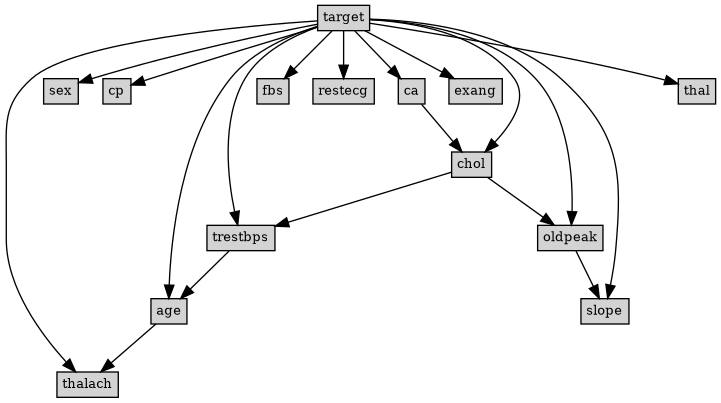

In [42]:
tan=projet.MAPTANClassifier(train)
tan.draw()

In [43]:
for i in [0,1,2]:
    print("Estimation de la proba de l'individu {} par MAPTANClassifier : {}".format(i,tan.estimProbas(utils.getNthDict(train,i))))
    print("Estimation de la classe de l'individu {} par MAPTANClassifier : {}".format(i,tan.estimClass(utils.getNthDict(train,i)))) 
print("test en apprentissage : {}".format(tan.statsOnDF(train)))
print("test en validation: {}".format(tan.statsOnDF(test)))

Estimation de la proba de l'individu 0 par MAPTANClassifier : {0: 0.022097318917168225, 1: 0.9779026810828317}
Estimation de la classe de l'individu 0 par MAPTANClassifier : 1
Estimation de la proba de l'individu 1 par MAPTANClassifier : {0: 0.00025585738109411353, 1: 0.999744142618906}
Estimation de la classe de l'individu 1 par MAPTANClassifier : 1
Estimation de la proba de l'individu 2 par MAPTANClassifier : {0: 2.8906366364158223e-06, 1: 0.9999971093633636}
Estimation de la classe de l'individu 2 par MAPTANClassifier : 1
test en apprentissage : {'VP': 403, 'VN': 112, 'FP': 26, 'FN': 1, 'Pr√©cision': 0.9393939393939394, 'Rappel': 0.9975247524752475}
test en validation: {'VP': 127, 'VN': 52, 'FP': 10, 'FN': 11, 'Pr√©cision': 0.927007299270073, 'Rappel': 0.9202898550724637}


ca chol
chol trestbps
trestbps age
age thalach
chol oldpeak
oldpeak slope


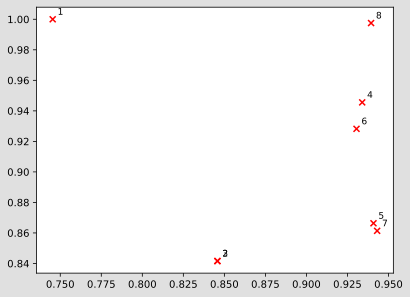

In [44]:
projet.mapClassifiers({"1":projet.APrioriClassifier(),
                "2":projet.ML2DClassifier(train,"exang"),
                "3":projet.MAP2DClassifier(train,"exang"),
                "4":projet.MAPNaiveBayesClassifier(train),
                "5":projet.MLNaiveBayesClassifier(train),
                "6":projet.ReducedMAPNaiveBayesClassifier(train,0.01),
                "7":projet.ReducedMLNaiveBayesClassifier(train,0.01),
                "8":projet.MAPTANClassifier(train),
               },train)

ca chol
chol trestbps
trestbps age
age thalach
chol oldpeak
oldpeak slope


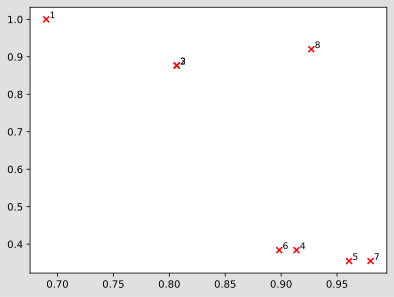

In [45]:
projet.mapClassifiers({"1":projet.APrioriClassifier(),
                "2":projet.ML2DClassifier(train,"exang"),
                "3":projet.MAP2DClassifier(train,"exang"),
                "4":projet.MAPNaiveBayesClassifier(train),
                "5":projet.MLNaiveBayesClassifier(train),
                "6":projet.ReducedMAPNaiveBayesClassifier(train,0.01),
                "7":projet.ReducedMLNaiveBayesClassifier(train,0.01),
                "8":projet.MAPTANClassifier(train),
               },test)

# Question 9

<div style="float:left;margin:0 10px 10px 0">
    <img src="question.png">
</div>
Quelle le√ßons & conclusion tirez-vous de ces exp√©riences sur les classifieurs bay√©siens ?

La principale difficult√© dans l‚Äôestimation de la probabilit√© post√©rieure $P(target|attr1,attr2,attr3\cdots)$ bas√©e sur la formule de Bayes est que la probabilit√© vraisemblance $P(attr1,attr2,attr3\cdots|target)$ est une probabilit√© conjointe sur tous les attributs et est difficile √† estimer directement √† partir d‚Äôun nombre limit√© d‚Äô√©chantillons d‚Äôapprentissage.

Et pour √©viter cette difficult, le classificateur **Na√Øve Bayes** utilise ¬´ l‚Äôhypoth√®se d‚Äôind√©pendance conditionnelle d‚Äôattribut ¬ª : Il suppose que $2$ attributs sont toujours ind√©pendants conditionnellement √† `target`. En d‚Äôautres termes, chaque attribut influence ind√©pendamment les r√©sultats de la classification.

Donc, par le mod√®le **Na√Øve Bayes**, nous pouvons alors d√©composer:


$$P(attr1,attr2,attr3,\cdots|target)= P(attr1|target)*ùëÉ(attr2|target)*ùëÉ(attr3|target)\cdots$$

et alors:

$$P(target|attr1,attr2,attr3,‚ãØ) = \frac{P(attr1,attr2,attr3,\cdots|target)*P(target)}{P(attr1,attr2,\cdots)}$$

Par la question 5.2, nous d√©composons $P(target|attr1,attr2,attr3,‚ãØ)$ √† la fin est :

$$\frac{P(attr1,attr2,attr3,\cdots|target)*P(target)}{P(target=0) * \prod_{i=1}^n {P(attr i|target=0)} + P(target=1) * \prod_{i=1}^n {P(attr i|target=1)}}$$ 

#### Nous pouvons g√©n√©raliser √† partir de ce cas de maladie cardiaque √† tous les autres exemples que nous voulons classer:

$$P(classe|attr1,attr2,attr3,‚ãØ) = \frac{P(attr1,attr2,attr3,\cdots|classe)*P(classe)}{\sum_{j=0}^k P(classe = j) * \prod_{i=1}^n {P(attr i|classe = j)}}$$

avec 
$$P(attr1,attr2,attr3,\cdots|classe)= P(attr1|classe)*ùëÉ(attr2|classe)*ùëÉ(attr3|classe)\cdots$$

Par une telle d√©composition et une telle formule, il est simple d'estimer les diff√©rentes classes.

Mais la classification **Na√Øve Bayes** n'est pas toujours correcte, comme le graphe pour la donnee `test` que nous avons obtenu dans la question 7.2, Il est clair que la  classification **Na√Øve Bayes** est tr√®s impr√©cise. Je pense que c'est parce que l'hypoth√®ses n'est pas tout √† fait correcte.